# Forecasting Stock Prices
## Monte Carlo Simulations Based on Historical Data

#### PYTHON VERSION

In [1]:
import sys
print(sys.version)

3.11.4 (main, Jul  5 2023, 13:45:01) [GCC 11.2.0]


### MC Asset Pricing
The basic recursive formula used for the purposes of this exercise:
\begin{align*}
\text{PriceToday}&=\text{PriceYesterday} \times e^r \\
\text{PriceToday}&=\text{PriceYesterday} \times e^{\text{ln}\frac{\text{PriceToday}}{\text{PriceYesterday}}} \\
\end{align*}
where <B>r</B> is the <A HREF="https://en.wikipedia.org/wiki/Rate_of_return"><B>logarithmic return</B></A>.

The aforementioed formula can be further broken down to two components:
\begin{equation*}\text{PriceToday}=\text{PriceYesterday} \times e^{\underbrace{\mu -\frac{\sigma^2}{2}}_{\text{drift}} \quad + \quad \underbrace{\sigma \mathbf{Z}(\text{Rand[0,1]})}_{\text{volatility}}}.\end{equation*}

In [23]:
import numpy as np  
import pandas as pd  
import yfinance as yf
from datetime import datetime

from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

yf.pdr_override()
y_symbols = ['MSFT']
startdate = datetime(2000,11,1)
data = pd.DataFrame()
#data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2000-1-1')['Adj Close']
data = wb.get_data_yahoo(y_symbols, start=startdate)['Adj Close']
log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()

drift = u - (0.5 * var)
stdev = log_returns.std()

t_intervals = 250
iterations = 100

daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

[*********************100%%**********************]  1 of 1 completed


Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [24]:
S0 = data.iloc[-1]
S0

317.010009765625

Create a variable price_list with the same dimension as the daily_returns matrix. 

In [25]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Set the values on the first row of the price_list array equal to S0.

In [27]:
price_list[0] = S0
price_list

array([[317.01000977, 317.01000977, 317.01000977, ..., 317.01000977,
        317.01000977, 317.01000977],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [28]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [29]:
price_list

array([[317.01000977, 317.01000977, 317.01000977, ..., 317.01000977,
        317.01000977, 317.01000977],
       [314.6220552 , 328.11055793, 320.45961111, ..., 324.89898676,
        308.58954681, 314.22422708],
       [314.16563169, 329.82340953, 320.11268542, ..., 318.26059495,
        302.7802592 , 315.1351792 ],
       ...,
       [315.28514051, 643.69938384, 316.02205232, ..., 335.80840878,
        701.50428703, 283.98400567],
       [312.48874034, 643.40081688, 316.95406728, ..., 324.21941887,
        691.01415097, 281.81804816],
       [320.31928936, 666.06435135, 316.68266223, ..., 333.57007352,
        695.82966486, 283.02343531]])

Finally, plot the obtained price list data.

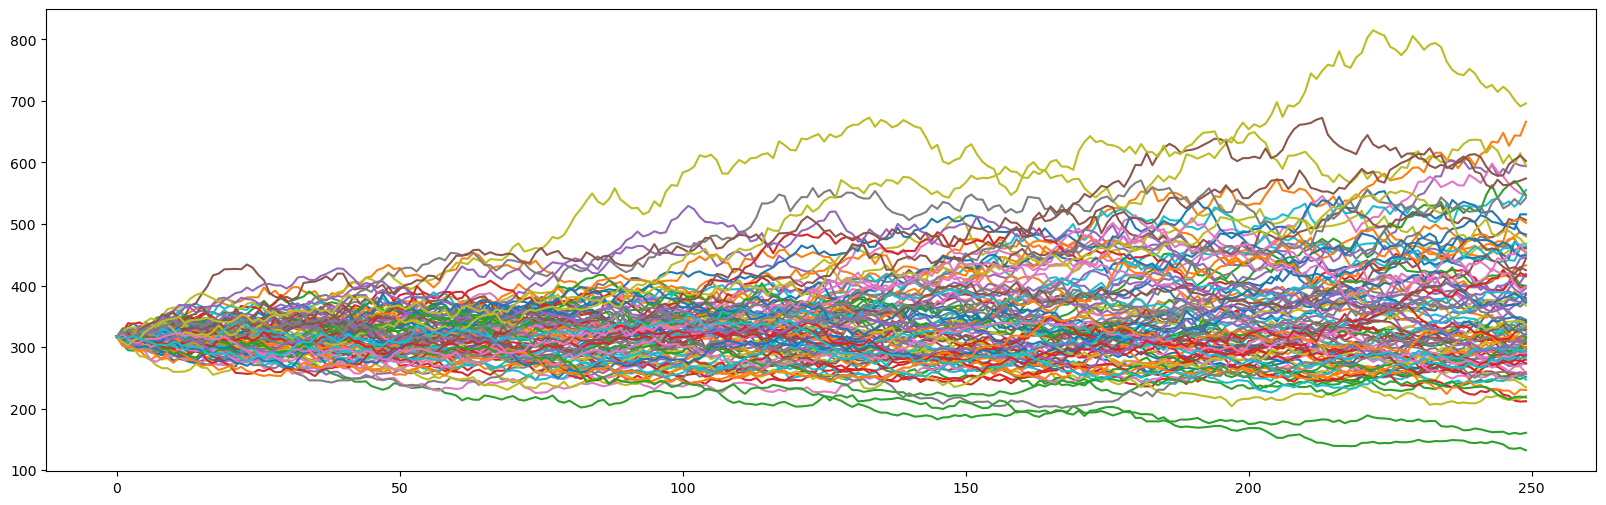

In [30]:
plt.figure(figsize=(20,6))
plt.plot(price_list);